# Problem Set 2 - Part 2
### Heather Chen

**Exercise 2.1.** You can verify that the analytical solution to the integral of the function
\begin{equation*}
  g(x)=0.1x^4 -1.5x^3 + 0.53x^2 + 2x + 1
\end{equation*}
between $x=-10$ and $x=10$ is $\int_{-10}^{10} g(x)dx = 4,373.3\bar{3}$. Write a Python function that will take as arguments an anonymous function that the user specifies representing $g(x)$, integration bounds $a$ and $b$, the number of intervals $N$, and
```python
method = {'midpoint', 'trapezoid', 'Simpsons'}
```
Using the composite methods, evaluate the numerical approximations of the integral $\int_a^b g(x)dx$ using all three Newton-Cotes methods in your function and compare the difference between the values of these integrals to the true analytical value of the integral.

**a)** Plot the absolute error of the difference between the approximated integral and the analytic integral for each of the three methods for different values of $N$ (number of bars). That is, create three different line plots--one for each Newton-Cotes rule--for which the $x$-axis is different numbers of nodes and the $y$-axis is the absolute approximation error for each number of nodes. Plot each of these lines for $N=[20, 21, 22, ... 200]$. You can create this vector with the code `Nvec = np.arange(20, 201, 1)`.

**b)** Why are the methods ranked the way they are? [Hint: It has to do with the original function g(x).] You might want to plot the function $g(x)$ between -10 and 10 to see what it looks like.

In [9]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt

def NCquadrature(func, a, b, N, method):
    if method == "midpoint":
        sum1 = 0
        for i in range(N):
            sum1 = sum1 + func(a + (2*i+1)*(b-a)/(2*N) )
        return (b-a)*sum1/N
    elif method == "trapezoid":
        sum2 = 0
        for i in range(N):
            if i == 0:
                sum2 = sum2 + func(a)
            else:
                sum2 = sum2 + 2*func(a + i*(b-a)/N)
        sum2 = sum2 + func(b)
        return (b-a)*sum2/(2*N)
    elif method == "Simpsons":
        sum3 = 0
        for i in range(2*N):
            if i == 0:
                sum3 = sum3 + func(a)
            elif i%2==1:
                sum3 = sum3 + 4*func(a + i*(b-a)/(2*N))
            elif i%2==0:
                sum3 = sum3 + 2*func(a + i*(b-a)/(2*N))
        sum3 = sum3 + func(b)
        return (b-a)*sum3/(6*N)

In [10]:
x = sy.symbols("x")
f_x = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
f = sy.lambdify(x, f_x)
f_x_int = lambda x: (0.1/5)*x**5 - (1.5/4)*x**4 + (0.53/3)*x**3 + x**2 + x
f_int = f_x_int(10) - f_x_int(-10)

Text(0.5, 1.0, 'Midpoint method')

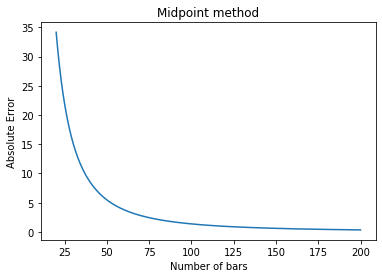

In [15]:
Nvec = np.arange(20, 201, 1)
dif1 = [abs(f_int - NCquadrature(f, -10, 10, n, "midpoint")) for n in Nvec]
difarray = np.array(dif)
ax = plt.gca()
ax.plot(Nvec, dif1)
plt.xlabel("Number of bars")
plt.ylabel("Absolute Error")
plt.title("Midpoint method")

Text(0.5, 1.0, 'Trapezoid method')

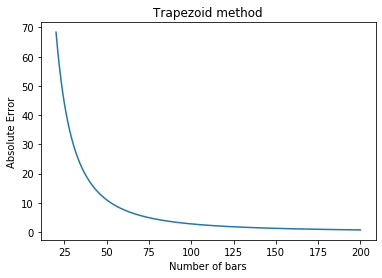

In [18]:
Nvec = np.arange(20, 201, 1)
dif2 = [abs(f_int - NCquadrature(f, -10, 10, n, "trapezoid")) for n in Nvec]
difarray = np.array(dif)
ax = plt.gca()
ax.plot(Nvec, dif2)
plt.xlabel("Number of bars")
plt.ylabel("Absolute Error")
plt.title("Trapezoid method")

Text(0.5, 1.0, 'Simpsons method')

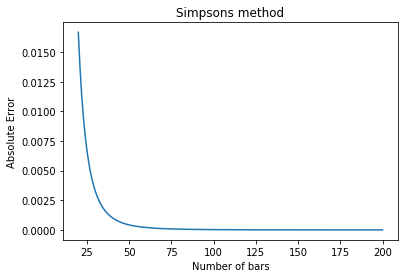

In [19]:
Nvec = np.arange(20, 201, 1)
dif3 = [abs(f_int - NCquadrature(f, -10, 10, n, "Simpsons")) for n in Nvec]
difarray = np.array(dif3)
ax = plt.gca()
ax.plot(Nvec, dif3)
plt.xlabel("Number of bars")
plt.ylabel("Absolute Error")
plt.title("Simpsons method")

b) The Simpsons method has the smallest absolute error compared with analytical integration. Given f(x)'s plot from -10 to 10, we can see that the function has some curve in it and is not at all linear. Therefore Simpson's method, which tries to capture and simulate the "curve" of the original function, produces the smallest absolute error. 

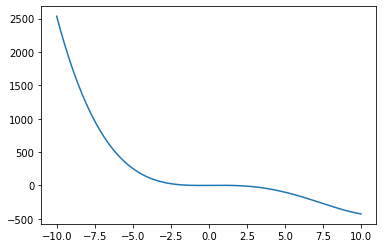

In [21]:
ax = plt.gca()
x_points = np.linspace(-10, 10, 10000)
ax.plot(x_points, f(x_points))

**Exercise 2.2.** Write a Python function that makes a Newton-Cotes discrete approximation of the distribution of the normally distributed variable $Z \sim N(\mu,\sigma)$. Let this function take as arguments the mean $\mu$, the standard deviation $\sigma$, the number of equally spaced nodes $N$ to estimate the distribution, and the number of standard deviations $k$ away from $\mu$ to make the furthest nodes on either side of $\mu$. Use the [`scipy.stats.norm.cdf`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) command for the cdf of the normal distribution to compute the weights $\omega_n$ for the nodes $x_n$. Have this function return a vector of nodes of $[Z_1,Z_2,...Z_N]$ and a vector of weights $[\omega_1,\omega_2,...\omega_N]$ such that $\omega_i$ is given by the integral under the normal distribution between the midpoints of the two closest nodes. Define $f(Z;\mu,\sigma)$ as the pdf of the normal distribution and $F(Z;\mu,\sigma)$ as the cdf.
\begin{equation*}
  \begin{split}
    &\omega_i =
      \begin{cases}
        F\left(\frac{Z_1 + Z_2}{2};\mu,\sigma\right) \quad\quad\quad\quad\:\text{if}\quad i = 1 \\
        \int_{Z_{min}}^{Z_{max}}f(Z;\mu,\sigma)dZ \quad\quad\:\:\text{if}\quad 1<i<N \\
        1 - F\left(\frac{Z_{N-1} + Z_{N}}{2};\mu,\sigma\right) \quad\text{if}\quad i = N
      \end{cases} \\
    &\text{where}\quad Z_{min} = \frac{Z_{i-1} + Z_{i}}{2} \quad\text{and}\quad Z_{max} = \frac{Z_{i} + Z_{i+1}}{2}
  \end{split}
\end{equation*}
What are the weights and nodes $\{\omega_n,Z_n\}_{n=1}^N$ for $\mu=5$, $\sigma=1.5$,$N=11$, and $k=3$??

In [22]:
from scipy.stats import norm
from scipy.integrate import quad
import pandas as pd

def NCnorm(mu, sigma, N, k):
    z_points = np.linspace(mu-k*sigma, mu+k*sigma, N)
    w_points = np.zeros(N)
    for i in range(N):
        if i==0:
            w_points[i] = norm.cdf((z_points[0]+z_points[1])/2, loc=mu, scale=sigma)
        elif i==N-1:
            w_points[i] = 1 - norm.cdf((z_points[N-2]+z_points[N-1])/2, loc=mu, scale=sigma)
        else:
            pdf = lambda x: norm.pdf(x, loc=mu, scale=sigma)
            z_min = (z_points[i-1]+z_points[i])/2
            z_max = (z_points[i]+z_points[i+1])/2
            w_points[i] = quad(pdf, z_min, z_max)[0]
    return z_points, w_points

In [23]:
z_nodes, w_nodes = NCnorm(mu=5, sigma=1.5, N=11, k=3)
ncdf = pd.DataFrame({"z nodes": z_nodes, "weights": w_nodes})
ncdf

,z nodes,weights
0,0.5,0.003467
1,1.4,0.014397
2,2.3,0.048943
3,3.2,0.117253
4,4.1,0.198028
5,5.0,0.235823
6,5.9,0.198028
7,6.8,0.117253
8,7.7,0.048943
9,8.6,0.014397


**Exercise 2.3.** If $Z\sim N(\mu,\sigma)$, then $A\equiv e^Z\sim LN(\mu,\sigma)$ is distributed lognormally and $\log(A)\sim N(\mu,\sigma)$. Use your knowledge that $A\equiv e^Z$, $\log(A)\sim N(\mu,\sigma)$, and your function from Exercise 2.2 to write a function that gives a discrete approximation to the lognormal distribution. Note: You will not end up with evenly spaced nodes $[A_1,A_2,...A_N]$, but your weights should be the same as in Exercise 2.2. What are the resulting weights and nodes $\{\omega_n,A_n\}_{n=1}^N$ for the calibration from Exercise 2.2: $\mu=5$, $\sigma=1.5$, $N=11$, and $k=3$?

In [24]:
def NClog(mu, sigma, N, k):
    z_nodes, w_nodes = NCnorm(mu, sigma, N, k)
    logz_nodes = np.exp(z_nodes)
    return logz_nodes, w_nodes

In [25]:
log_nodes, log_w = NClog(5, 1.5, 11, 3)
logdf = pd.DataFrame({"A nodes": log_nodes, "weights": log_w})
logdf

,A nodes,weights
0,1.648721,0.003467
1,4.055200,0.014397
2,9.974182,0.048943
3,24.532530,0.117253
4,60.340288,0.198028
5,148.413159,0.235823
6,365.037468,0.198028
7,897.847292,0.117253
8,2208.347992,0.048943
9,5431.659591,0.014397


**Exercise 2.4.** Let $Y_i$ represent the income of individual $i$ in the United States for all individuals $i$. Assume that income $Y_i$ is lognormally distributed in the U.S. according to $Y_i\sim LN(\mu,\sigma)$, where the mean of log income is $\mu = 10.5$ and the standard deviation of log income is $\sigma = 0.8$. Use your function from Exercise 2.3 to compute a discrete approximation of the expected value of income or average income in the U.S using $N = 11$ and $k=3$. How does your approximation compare to the exact expected value of $E[Y] = e^{\mu + \frac{\sigma^2}{2}}$?

In [26]:
import math

y_nodes, weights = NClog(10.5, 0.8, 11, 3)
E_est = y_nodes @ weights
E_acu = math.exp(10.5+0.8**2/2)
print("The difference between my estimate and true value is: {}".format(abs(E_est - E_acu)))

The difference between my estimate and true value is: 341.36918424414034


**Exercise 3.1.** Approximate the integral of the function in Exercise 2.1 using Gaussian quadrature with $N=3$, $(\omega_1,\omega_2,\omega_3,x_1,x_2,x_3)$. Use the class of polynomials $h_i(x)=x^i$. How does the accuracy of your approximated integral compare to the approximations from Exercise 2.1 using $N=3$ for the midpoint rule, trapezoid rule, and Simpson's rule, and the true known analytical value of the integral?

In [27]:
import scipy

def Gau(f, N, a, b):
    init_weight = [1/N for i in range(N)]
    init_x = [a+i*(b-a)/(N-1) for i in range(N)]
    init = init_weight+init_x
    def func(x):
        res = []
        weights = x[:N]
        nodes = x[N:]
        for i in range(2*N):
            poly = sum(weights[k]*(nodes[k]**i) for k in range(N))
            res.append((b**(i+1)-a**(i+1))/(i+1)-poly)
        return tuple(k for k in res)
    roots = [i for i in scipy.optimize.root(func, init)['x']]
    weights = roots[:N]
    nodes = roots[N:]
    est = 0
    for i in range(N):
        est = est + weights[i]*f(nodes[i])
    return est

In [29]:
f_x = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
f = sy.lambdify(x, f_x)
Gau_est = Gau(f, 3, -10, 10)
print("My Gaussian quadrature estimate is: {}".format(Gau_est))
for me in ["midpoint", "trapezoid", "Simpsons"]:
    NC_est = NCquadrature(f, -10, 10, 3, me)
    print("The difference between Gaussian estimate and midpoint estimate is: {}".format(abs(Gau_est-NC_est)))
print("The difference between Gaussian estimate and true value is: {}".format(abs(Gau_est-f_int)))

My Gaussian quadrature estimate is: 4373.333333189601
The difference between Gaussian estimate and midpoint estimate is: 1405.5144031484506
The difference between Gaussian estimate and midpoint estimate is: 2909.7942388268593
The difference between Gaussian estimate and midpoint estimate is: 32.92181084331878
The difference between Gaussian estimate and true value is: 1.437329046893865e-07


**Exercise 3.2.** Use the Python Gaussian quadrature command [`scipy.integrate.quad`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) to numerically approximate the integral from Exercise 2.1.
\begin{equation*}
  \int_{-10}^{10} g(x)dx \quad\text{where}\quad g(x)=0.1x^4 -1.5x^3 + 0.53x^2 + 2x + 1
\end{equation*}
How does the approximated integral using the [`scipy.integrate.quad`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) command compare to the known analytical value of the integral?

In [30]:
Quad_est = quad(f, -10, 10)[0]
print("The difference between quad estimate and true value is: {}".format(abs(Quad_est-f_int)))

The difference between quad estimate and true value is: 0.0


**Exercise 4.1.** Use Monte Carlo integration to approximate the value of $\pi$. Define a function in that takes as arguments a function $g(\mathbf{x})$ of a vector of variables $\mathbf{x}$, the domain $\Omega$ of $\mathbf{x}$, and the number of random draws $N$ and returns the Monte Carlo approximation of the integral $\int_\Omega g(\mathbf{x}) d\mathbf{x}$. Let $\Omega$ be a generalized rectangle--width $x$ and height $y$. In order to approximate $\pi$, let the functional form of the anonymous function be $g(x,y)$ from Section 4.1 with domain $\Omega = [-1,1]\times[-1,1]$. What is the smallest number of random draws $N$ from $\Omega$ that matches the true value of $\pi$ to the 4th decimal 3.1415? Set the random seed in your uniform random number generator to 25. This will make the correct answer consistent across submissions.

In [31]:
import numpy as np

np.random.seed(25)
def MC_pi(g, omega, N):
    x_down, y_down, x_up, y_up = omega[0], omega[1], omega[2], omega[3]
    x_points = np.random.uniform(x_down, x_up, N)
    y_points = np.random.uniform(y_down, y_up, N)
    est = np.sum(g(x_points, y_points))
    return (4/N)*est

cir = lambda x,y: x**2+y**2<=1

In [32]:
num = 1
while True:
    if round(MC_pi(cir, [-1,-1,1,1], num), 4) != 3.1415:
        num = num + 1
    else:
        print("The smallest number that match true value of 3.1415 is: {}".format(num))
        break

The smallest number that match true value of 3.1415 is: 615


**Exercise 4.2.** Define a function in that returns the $n$-th element of a $d$-dimensional equidistributed sequence.  It should have support for the four sequences in the Table in Section 4.2. List the 1,073rd element (a pair of values, each between 0 and 1) of the 2-dimensional ($d=2$) equidistributed of each of the four types of sequences.

In [36]:
def isPrime(n):
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False
    return True

def primes_ascend(N, min_val=2):
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2
    return primes_vec

In [37]:
def rational_list(d):
    return [1/(i+1) for i in range(d)]

def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

def equidis(n, d, method):
    prime_points = primes_ascend(d)
    res = []
    if method == "Weyl":
        for i in range(d):
            x = n*np.sqrt(prime_points[i])
            res.append(x - truncate(x))
        return res
    elif method == "Haber":
        for i in range(d):
            x = (n*(n+1)/2)*np.sqrt(prime_points[i])
            res.append(x - truncate(x))
        return res
    elif method == "Niederreiter":
        for i in range(d):
            x = n*(2**((i+1)/(d+1)))
            res.append(x - truncate(x))
        return res
    elif method == "Baker":
        rat_list = rational_list(d)
        for i in range(d):
            x = n*(np.exp(rat_list[i]))
            res.append(x - truncate(x))
        return res
        

In [48]:
for me in ["Weyl", "Haber", "Niederreiter", "Baker"]:
    print("The 1073rd element of 2D using {} method is: {}".format(me, str(equidis(1073, 2, me))))

The 1073rd element of 2D using Weyl method is: [0.45115242633119124, 0.49051652140519764]
The 1073rd element of 2D using Haber method is: [0.2688529398292303, 0.40737199457362294]
The 1073rd element of 2D using Niederreiter method is: [0.8952865371988992, 0.2813287618778304]
The 1073rd element of 2D using Baker method is: [0.716401936555485, 0.07792346123756033]


**Exercise 4.3** Repeat Exercise 4.1 to approximate the value of $\pi$, this time using quasi-Monte Carlo integration.  You will need to appropriately scale the equidistributed sequences. Compare the rates of convergence. What is the smallest number of random draws $N$ from $\Omega$ for the quasi-Monte Carlo integration that matches the true value of $\pi$ to the 4th decimal 3.1415?. Set the seed in your uniform random number generator to 25. This will make the correct answer consistent across submissions.

In [61]:
np.random.seed(25)
def quasi_MC(N, method, g, omega):
    x_down, y_down, x_up, y_up = omega[0], omega[1], omega[2], omega[3]
    x_points = [(x_up - x_down)*equidis(i, 2, method)[0] + x_down for i in range(N)]
    y_points = [(y_up - y_down)*equidis(i, 2, method)[1] + y_down for i in range(N)]
    est = np.sum(g(np.array(x_points), np.array(y_points)))
    
    return (4/N)*est

for me in ["Weyl", "Haber", "Niederreiter", "Baker"]:
    num = 1
    while True:
        if round(quasi_MC(num, me, cir, [-1,-1,1,1]), 4) != 3.1415:
            num = num + 1
        else:
            print("Using {}, the smallest number that match true value 3.1415 is: {}".format(me, num))
            break

Using Weyl, the smallest number that match true value 3.1415 is: 1230
Using Haber, the smallest number that match true value 3.1415 is: 2064
Using Niederreiter, the smallest number that match true value 3.1415 is: 1845
Using Baker, the smallest number that match true value 3.1415 is: 205


The smallest number of random draws N from $\omega$ is Baker compared with all methods. 